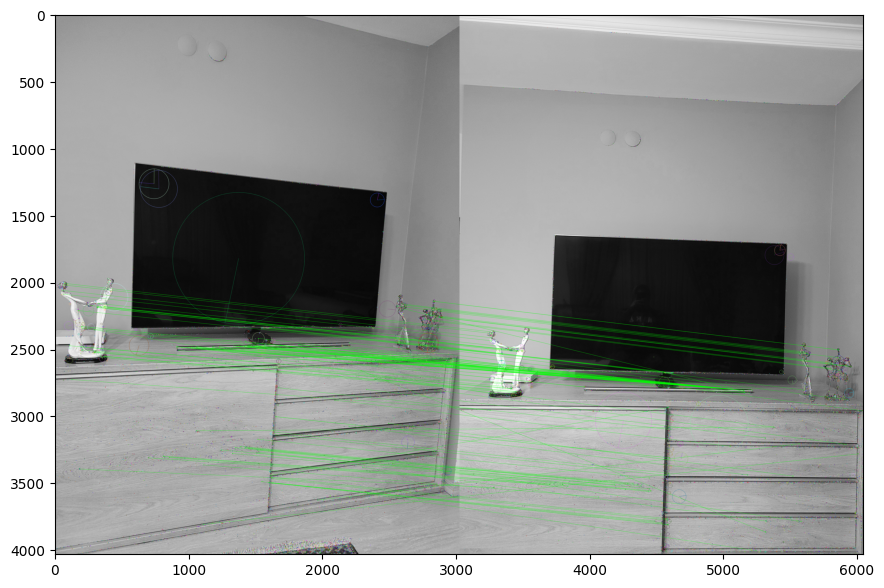

In [2]:
import cv2 as cv 
import cv2
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
from skimage import color
from skimage import io

image_1_url = "https://raw.githubusercontent.com/i15911403/260201060/master/20221116_202905.jpg"
image_2_url = "https://raw.githubusercontent.com/i15911403/260201060/master/20221116_202847.jpg"

old_image_1 = io.imread(image_1_url)
old_image_2 = io.imread(image_2_url)
image_1 = cv2.normalize(old_image_1, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
image_2 = cv2.normalize(old_image_2, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
#I was getting error: OpenCV(4.6.0) so I found a solution like this to solve the error

old_image_1_gray = color.rgb2gray(old_image_1)
old_image_2_gray = color.rgb2gray(old_image_2)
image_1_gray = cv2.normalize(old_image_1_gray, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
image_2_gray = cv2.normalize(old_image_2_gray, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')

sift = cv2.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(image_1_gray, None)
keypoints_2, descriptors_2 = sift.detectAndCompute(image_2_gray, None)
image_1=cv2.drawKeypoints(image_1_gray,keypoints_1,image_1,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
image_2=cv2.drawKeypoints(image_2_gray,keypoints_2,image_2,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
#I referenced this code from our teacher's 07_08 jupyter code slide to built keypoint and descriptor

bf = cv2.BFMatcher()
matches = bf.knnMatch(descriptors_1, descriptors_2, k=2)
good_matches = []
for m,n in matches:
    if m.distance < 0.6*n.distance:
        good_matches.append(m)
draw_params = dict(matchColor = (0,255,0),singlePointColor = None, flags = 2)
image_3 = cv2.drawMatches(image_1,keypoints_1,image_2,keypoints_2,good_matches,None,**draw_params)
plt.figure(figsize = (14,7))
plt.imshow(image_3, 'gray')
plt.show()